In [52]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [53]:
DATA_FILES_DIR = './data/'
OUTPUT_CHARTS_DIR = './charts/'

if not os.path.exists(DATA_FILES_DIR):
    print(f'ERROR: cannot find dir {DATA_FILES_DIR}')
if not os.path.exists(OUTPUT_CHARTS_DIR):
    os.makedirs(OUTPUT_CHARTS_DIR)

# Statistics per region in Italy

In [54]:
italy_region_data_cols = ['Date', 'RegionName', 'HospitalizedPatients', 'IntensiveCarePatients',
       'TotalHospitalizedPatients', 'HomeConfinement', 'CurrentPositiveCases',
       'NewPositiveCases', 'Recovered', 'Deaths', 'TotalPositiveCases',
       'TestsPerformed']      

italy_region = pd.read_csv(f"{DATA_FILES_DIR}covid19_italy_region.csv", usecols=italy_region_data_cols)
italy_region['Date'] = pd.to_datetime(italy_region['Date'])

In [55]:
first_date = italy_region['Date'].min()
last_date = italy_region['Date'].max()
print(f"Dates: {first_date} - {last_date}")
print(f'{italy_region.shape} samples, attributes')
italy_region.describe().T

Dates: 2020-02-24 18:00:00 - 2020-03-11 17:00:00
(357, 12) samples, attributes


,count,mean,std,min,25%,50%,75%,max
HospitalizedPatients,357.0,85.943978,365.536956,0.0,0.0,4.0,20.0,3852.0
IntensiveCarePatients,357.0,16.302521,60.098312,0.0,0.0,0.0,6.0,560.0
TotalHospitalizedPatients,357.0,102.249300,424.602692,0.0,0.0,5.0,26.0,4412.0
HomeConfinement,357.0,58.831933,155.945142,0.0,0.0,5.0,33.0,1351.0
CurrentPositiveCases,357.0,161.078431,560.628324,0.0,1.0,11.0,60.0,5763.0
NewPositiveCases,357.0,29.663866,112.114729,-63.0,0.0,2.0,18.0,1336.0
Recovered,357.0,16.064426,91.834143,0.0,0.0,0.0,1.0,900.0
Deaths,357.0,9.056022,48.985692,0.0,0.0,0.0,1.0,617.0
TotalPositiveCases,357.0,186.198880,695.151291,0.0,1.0,11.0,61.0,7280.0
TestsPerformed,357.0,1449.663866,3676.528390,0.0,33.0,168.0,776.0,25629.0


In [56]:
# RegionName is irrelevant for the max statistics
italy_region[filter(lambda col : col != 'RegionName', italy_region_data_cols)].max()

Date                         2020-03-11 17:00:00
HospitalizedPatients                        3852
IntensiveCarePatients                        560
TotalHospitalizedPatients                   4412
HomeConfinement                             1351
CurrentPositiveCases                        5763
NewPositiveCases                            1336
Recovered                                    900
Deaths                                       617
TotalPositiveCases                          7280
TestsPerformed                             25629
dtype: object

In [65]:
%timeit italy_region['RegionName'].nunique()
%timeit set(italy_region['RegionName'].values) # 10x faster!

147 µs ± 9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
9.37 µs ± 278 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Legend order
We want the legend to follow the descending order of the particular stat that we are charting (at last_date). 

In [58]:
# this is the order that we want for the stat CurrentPositiveCases
italy_region[italy_region['Date']==last_date].sort_values(by='CurrentPositiveCases', ascending=False)['RegionName']

345         Lombardia
341    Emilia Romagna
356            Veneto
348          Piemonte
346            Marche
352           Toscana
344           Liguria
340          Campania
343             Lazio
342     Friuli V. G. 
351           Sicilia
338      P.A. Bolzano
353       P.A. Trento
349            Puglia
354            Umbria
350          Sardegna
336           Abruzzo
355     Valle d'Aosta
339          Calabria
347            Molise
337        Basilicata
Name: RegionName, dtype: object

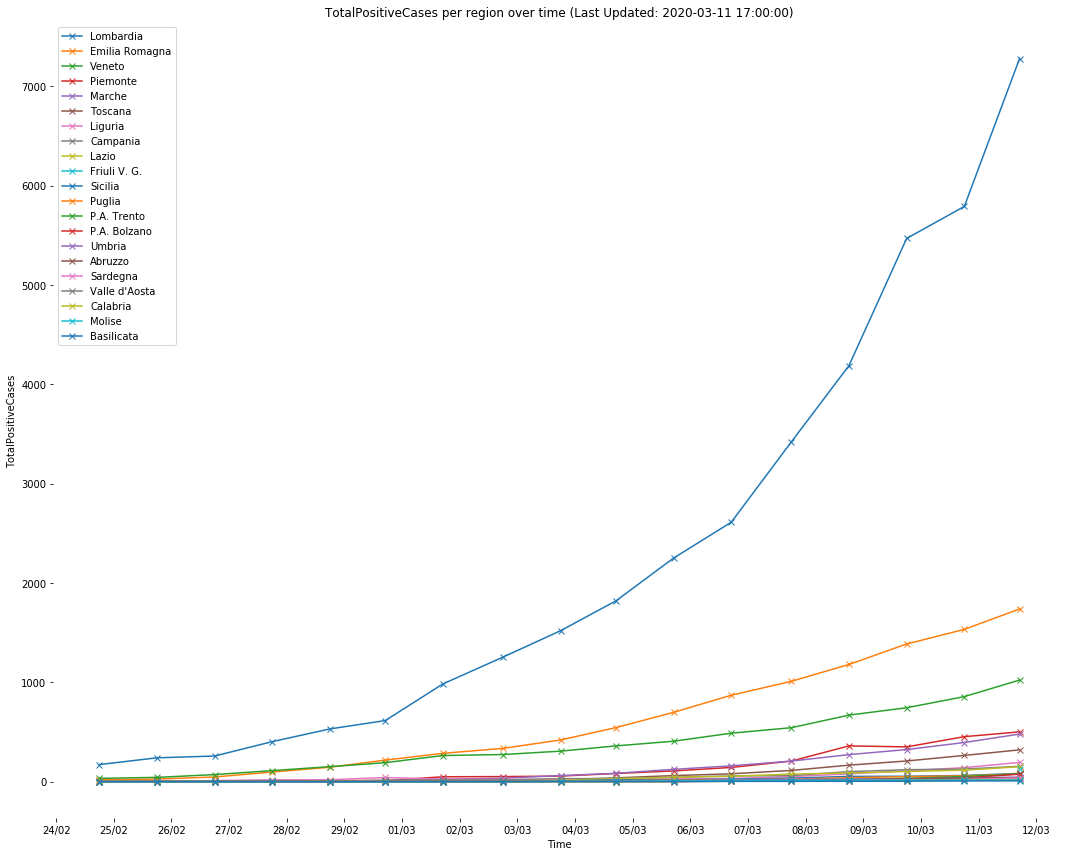

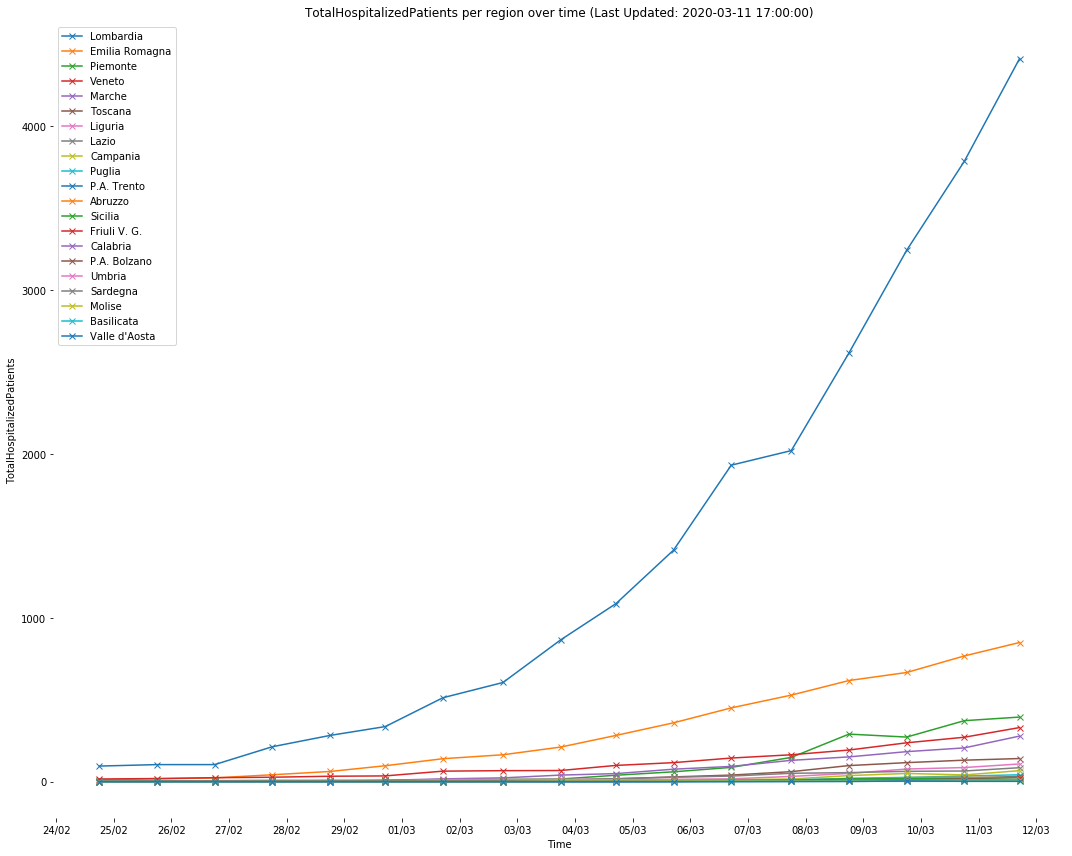

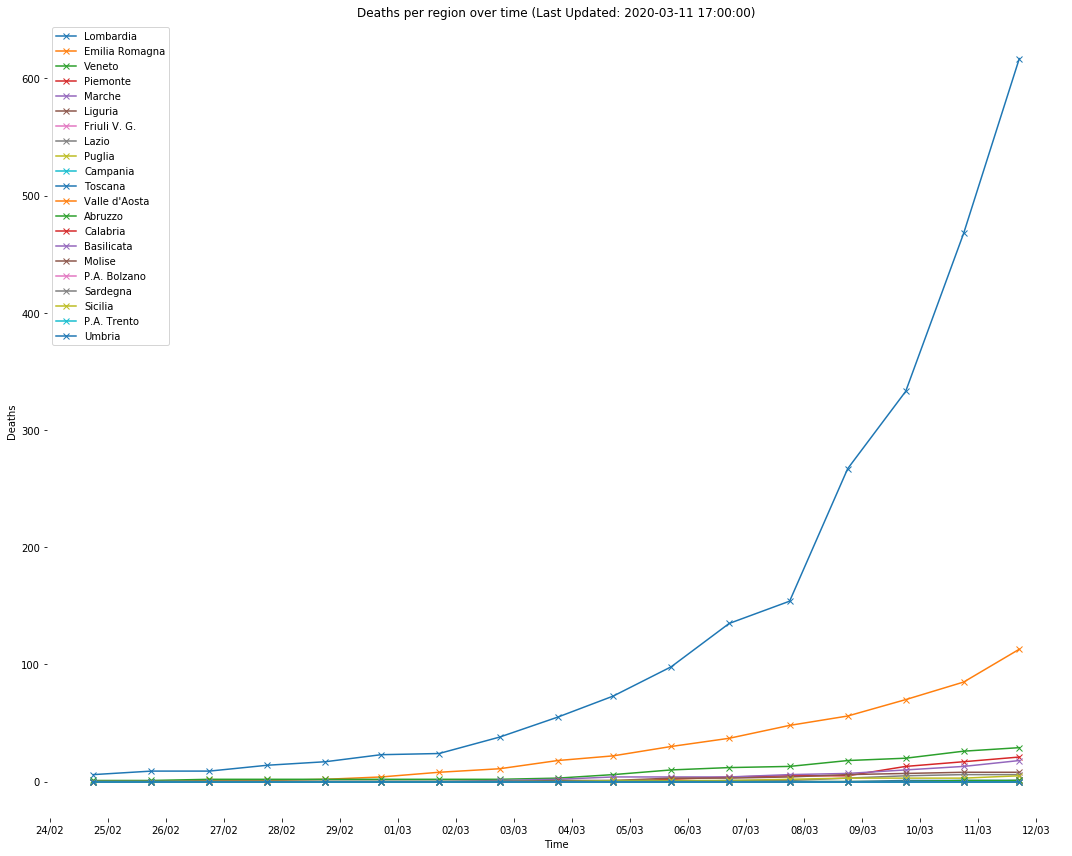

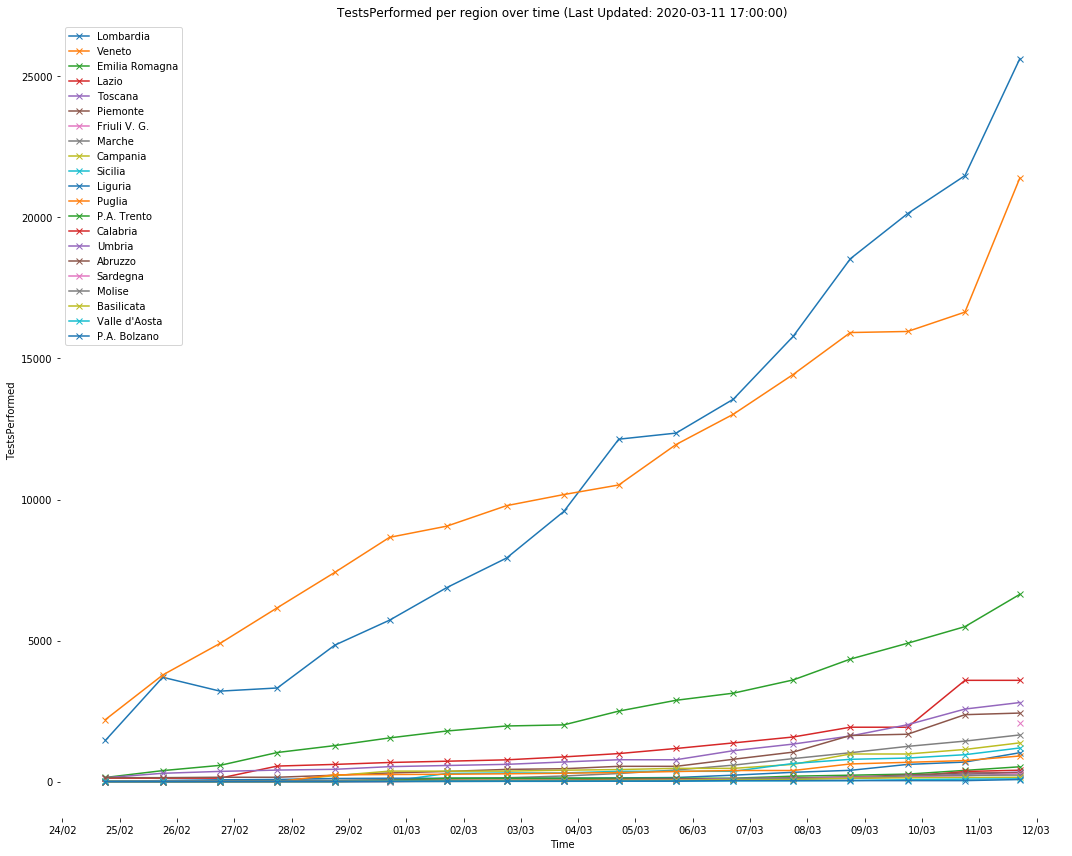

In [59]:
for stat in ['TotalPositiveCases', 'TotalHospitalizedPatients', 'Deaths', 'TestsPerformed']:
    plt.figure(figsize=(15, 12))
    for region in italy_region[italy_region['Date']==last_date].sort_values(by=stat, ascending=False)['RegionName']:
        plt.plot(italy_region[italy_region['RegionName'] == region]['Date'], 
                 italy_region[italy_region['RegionName'] == region][stat],
                 label=region,
                 marker='x')
    plt.xlabel('Time')
    plt.ylabel(f'{stat}')
    plt.title(f'{stat} per region over time (Last Updated: {last_date})')
    plt.legend()
    plt.box(False)
    plt.tight_layout()
    import matplotlib.dates as mdates
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
    plt.savefig(f'{OUTPUT_CHARTS_DIR}ita_region_{stat}.png', dpi=300)

In [60]:
italy_region_cluster_cols = ['Date', 'RegionName', 'Latitude', 'Longitude', 'TotalPositiveCases']      

italy_region_cluster = pd.read_csv(f"{DATA_FILES_DIR}covid19_italy_region.csv", usecols=italy_region_cluster_cols)
italy_region_cluster['Date'] = pd.to_datetime(italy_region_cluster['Date'])
italy_region_cluster = italy_region_cluster[italy_region_cluster['Date']==last_date]
italy_region_cluster

,Date,RegionName,Latitude,Longitude,TotalPositiveCases
336,2020-03-11 17:00:00,Abruzzo,42.351222,13.398438,38
337,2020-03-11 17:00:00,Basilicata,40.639471,15.805148,8
338,2020-03-11 17:00:00,P.A. Bolzano,46.499335,11.356624,75
339,2020-03-11 17:00:00,Calabria,38.109228,15.643453,19
340,2020-03-11 17:00:00,Campania,40.839566,14.250850,154
341,2020-03-11 17:00:00,Emilia Romagna,44.494367,11.341721,1739
342,2020-03-11 17:00:00,Friuli V. G.,45.649435,13.768136,126
343,2020-03-11 17:00:00,Lazio,41.892770,12.483667,150
344,2020-03-11 17:00:00,Liguria,44.411493,8.932699,194
345,2020-03-11 17:00:00,Lombardia,45.466794,9.190347,7280


In [61]:
import folium
# may require pip install folium
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, lat, lon, count in zip(italy_region_cluster['RegionName'], italy_region_cluster['Latitude'], 
                                   italy_region_cluster['Longitude'], italy_region_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map

In [63]:
italy_province_cluster_cols = ['Date', 'RegionName', 'ProvinceName', 'Latitude', 'Longitude', 'TotalPositiveCases']      

italy_province_cluster = pd.read_csv(f"{DATA_FILES_DIR}covid19_italy_province.csv", usecols=italy_province_cluster_cols)
italy_province_cluster['Date'] = pd.to_datetime(italy_province_cluster['Date'])
italy_province_cluster = italy_province_cluster[(italy_province_cluster['Date']==last_date) & 
                                                 (italy_province_cluster['Latitude']!=0.0) &
                                                 (italy_province_cluster['TotalPositiveCases']!=0.0)]
italy_province_cluster

,Date,RegionName,ProvinceName,Latitude,Longitude,TotalPositiveCases
2048,2020-03-11 17:00:00,Abruzzo,Chieti,42.351032,14.167546,9.0
2049,2020-03-11 17:00:00,Abruzzo,L'Aquila,42.351222,13.398438,6.0
2050,2020-03-11 17:00:00,Abruzzo,Pescara,42.464584,14.213648,18.0
2051,2020-03-11 17:00:00,Abruzzo,Teramo,42.658918,13.704400,5.0
2053,2020-03-11 17:00:00,Basilicata,Matera,40.667512,16.597924,3.0
...,...,...,...,...,...,...
2170,2020-03-11 17:00:00,Veneto,Rovigo,45.071073,11.790070,14.0
2171,2020-03-11 17:00:00,Veneto,Treviso,45.667546,12.245074,185.0
2172,2020-03-11 17:00:00,Veneto,Venezia,45.434905,12.338452,179.0
2173,2020-03-11 17:00:00,Veneto,Verona,45.438390,10.993527,110.0


In [64]:
italy_map = folium.Map(location=[42.8719, 12.5674], zoom_start=5, tiles='Stamen Toner')

for region, province, lat, lon, count in zip(italy_province_cluster['RegionName'], 
                                             italy_province_cluster['ProvinceName'],
                                             italy_province_cluster['Latitude'], 
                                             italy_province_cluster['Longitude'], 
                                             italy_province_cluster['TotalPositiveCases']):
    folium.CircleMarker([lat, lon],
                        radius=count/200,
                        color='red',
                        popup=f'RegionName: {region}<br>ProvinceName: {province}<br>TotalPositiveCases: {count}<br>',
                        fill_color='red',
                        fill_opacity=0.7).add_to(italy_map)

italy_map